# Predicting if a person would buy Medical insurnace based on his age using logistic regression


**Above is a binary logistic regression problem 
as there are only two possible outcomes 
(i.e. if person buys medical insurance or he/she doesn't)**
   

# step 1 -Import required libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [33]:
df = pd.read_csv("Medical_Insurance.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


# Step 2-Plot the data

To see the data distribution

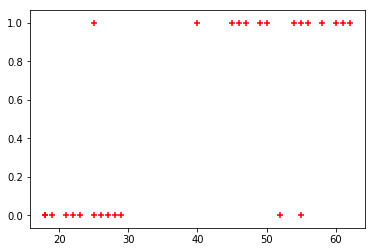

In [7]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

# Split the datset in train and test data

In [8]:
df.shape

(27, 2)

From sklearn.model_selection import train_test_split method

In [9]:
from sklearn.model_selection import train_test_split

First parameter is X=age # x=has to be multidimentional array that why [['age']] so it's passed in dataframe
Second parameter id Y=bought_insurance

90% dataset we are using for training the model, 10% for testing

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=0)

C:\Users\Fingertips\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1,random_state=0)

In [12]:
X_test

,age
2,47
24,50
14,49


In [13]:
X_train.head()

,age
17,58
5,56
11,28
23,45
13,29


In [32]:
Y_test

2     1
24    1
14    1
Name: bought_insurance, dtype: int64

# Model Intiliazation

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

fit in sklearn is used to train the model

In [15]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Prediction

In [35]:
y_predicted=model.predict(X_test)
y_predicted

array([1, 1, 1], dtype=int64)

In [17]:
model.predict(56) # But medical insurance

array([1], dtype=int64)

In [38]:
model.predict(20) # Will not buy

array([0], dtype=int64)

Probability of both the class-0(Not Buy) and 1(Buy)-Probability >0.5 will but the insurance<0.5 will not  buy

In [19]:
model.predict_proba(X_test)

array([[ 0.36198239,  0.63801761],
       [ 0.32859393,  0.67140607],
       [ 0.33955206,  0.66044794]])

# Score show the accuracy of the model-1 BCZ we have small size dataset

In [20]:
model.score(X_test,Y_test)

1.0

# Finding Accuracy

In [21]:
from sklearn import metrics 

In [22]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [23]:
accuracy = metrics.accuracy_score(Y_test, y_predicted)

In [24]:
accuracy_percentage = 100 * accuracy
accuracy_percentage

100.0

# Confusion Matrix

In [25]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_predicted,labels=[1,0])
cnf_matrix

array([[3, 0],
       [0, 0]], dtype=int64)

In [28]:
print('cnf_matrix : \n',cnf_matrix)

cnf_matrix : 
 [[3 0]
 [0 0]]


# Classification Report

In [24]:
report=classification_report(Y_test, y_predicted) 

In [25]:
print(report)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         3

